In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision = 3, suppress = True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [3]:
from keras.datasets import mnist
import tensorflow as tf
import keras

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 7s 1us/step


In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 # 0-255 转换成0-1
X_test /= 255

In [10]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape = (784, )), # hidden layer
    Activation('relu'),
    Dense(10), # output layer
    Activation('softmax'),
])

In [ ]:
# another two method to modify model
#model = Sequential()
#model.add(Dense(32, input_dim = 784)
#model.add(Activation('relu'))

#model = Sequential([
#    Dense(32, input_shape = (784, ), activation = 'relu'), 
#    Dense(10, activation = 'softmax'),
#])

In [12]:
model.compile('adam', 'categorical_crossentropy', metrics = ['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
activation (Activation)      (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [15]:
# 25120 = 784 * 32 + 1 * 32 (every neuron has a bias term)
# 330 = 320 * 10 + 1 * 10

In [16]:
model.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1)

Epoch 1/10
469/469 [==============================] - 0s 915us/step - loss: 0.4956 - accuracy: 0.8644
Epoch 2/10
469/469 [==============================] - 0s 866us/step - loss: 0.2438 - accuracy: 0.9312
Epoch 3/10
469/469 [==============================] - 0s 861us/step - loss: 0.1973 - accuracy: 0.9437
Epoch 4/10
469/469 [==============================] - 0s 802us/step - loss: 0.1672 - accuracy: 0.9520
Epoch 5/10
469/469 [==============================] - 0s 747us/step - loss: 0.1457 - accuracy: 0.9584
Epoch 6/10
469/469 [==============================] - 0s 818us/step - loss: 0.1308 - accuracy: 0.9628
Epoch 7/10
469/469 [==============================] - 0s 738us/step - loss: 0.1184 - accuracy: 0.9662
Epoch 8/10
469/469 [==============================] - 0s 741us/step - loss: 0.1082 - accuracy: 0.9689
Epoch 9/10
469/469 [==============================] - 0s 719us/step - loss: 0.1004 - accuracy: 0.9707
Epoch 10/10
469/469 [==============================] - 0s 714us/step - loss: 0.093

In [17]:
model.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_split = 0.1)

Epoch 1/10
422/422 [==============================] - 0s 1ms/step - loss: 0.0896 - accuracy: 0.9739 - val_loss: 0.0762 - val_accuracy: 0.9778
Epoch 2/10
422/422 [==============================] - 0s 882us/step - loss: 0.0828 - accuracy: 0.9761 - val_loss: 0.0812 - val_accuracy: 0.9768
Epoch 3/10
422/422 [==============================] - 0s 878us/step - loss: 0.0789 - accuracy: 0.9767 - val_loss: 0.0794 - val_accuracy: 0.9768
Epoch 4/10
422/422 [==============================] - 0s 809us/step - loss: 0.0745 - accuracy: 0.9783 - val_loss: 0.0867 - val_accuracy: 0.9753
Epoch 5/10
422/422 [==============================] - 0s 825us/step - loss: 0.0709 - accuracy: 0.9798 - val_loss: 0.0821 - val_accuracy: 0.9757
Epoch 6/10
422/422 [==============================] - 0s 975us/step - loss: 0.0673 - accuracy: 0.9803 - val_loss: 0.0836 - val_accuracy: 0.9763
Epoch 7/10
422/422 [==============================] - 0s 891us/step - loss: 0.0644 - accuracy: 0.9812 - val_loss: 0.0861 - val_accuracy: 0

In [20]:
score = model.evaluate(X_test, y_test, verbose = 0)
score

[0.10439101606607437, 0.9684000015258789]

In [21]:
model = Sequential([
    Dense(32, input_shape = (784, )), # hidden layer
    Activation('relu'),
    Dense(10), # output layer
    Activation('softmax'),
])
model.compile('adam', 'categorical_crossentropy', metrics = ['accuracy'])

In [22]:
model.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_split = 0.1)

Epoch 1/10
422/422 [==============================] - 0s 1ms/step - loss: 0.5365 - accuracy: 0.8583 - val_loss: 0.2330 - val_accuracy: 0.9375
Epoch 2/10
422/422 [==============================] - 0s 1ms/step - loss: 0.2514 - accuracy: 0.9295 - val_loss: 0.1781 - val_accuracy: 0.9493
Epoch 3/10
422/422 [==============================] - 0s 931us/step - loss: 0.2035 - accuracy: 0.9414 - val_loss: 0.1541 - val_accuracy: 0.9573
Epoch 4/10
422/422 [==============================] - 0s 935us/step - loss: 0.1764 - accuracy: 0.9492 - val_loss: 0.1418 - val_accuracy: 0.9610
Epoch 5/10
422/422 [==============================] - 0s 832us/step - loss: 0.1573 - accuracy: 0.9546 - val_loss: 0.1321 - val_accuracy: 0.9645
Epoch 6/10
422/422 [==============================] - 0s 1ms/step - loss: 0.1430 - accuracy: 0.9587 - val_loss: 0.1229 - val_accuracy: 0.9675
Epoch 7/10
422/422 [==============================] - 0s 754us/step - loss: 0.1311 - accuracy: 0.9619 - val_loss: 0.1196 - val_accuracy: 0.968

In [23]:
model = Sequential([
    Dense(32, input_shape = (784, )), # hidden layer
    Activation('relu'),
    Dense(10), # output layer
    Activation('softmax'),
])
model.compile('adam', 'categorical_crossentropy', metrics = ['accuracy'])
history_callback = model.fit(X_train, y_train, batch_size = 128, epochs = 100, verbose = 1, validation_split = 0.1)

Epoch 1/100
422/422 [==============================] - 0s 1ms/step - loss: 0.5255 - accuracy: 0.8571 - val_loss: 0.2455 - val_accuracy: 0.9303
Epoch 2/100
422/422 [==============================] - 0s 905us/step - loss: 0.2736 - accuracy: 0.9228 - val_loss: 0.2009 - val_accuracy: 0.9450
Epoch 3/100
422/422 [==============================] - 0s 885us/step - loss: 0.2272 - accuracy: 0.9359 - val_loss: 0.1740 - val_accuracy: 0.9537
Epoch 4/100
422/422 [==============================] - 0s 788us/step - loss: 0.1971 - accuracy: 0.9444 - val_loss: 0.1568 - val_accuracy: 0.9572
Epoch 5/100
422/422 [==============================] - 0s 858us/step - loss: 0.1739 - accuracy: 0.9504 - val_loss: 0.1489 - val_accuracy: 0.9615
Epoch 6/100
422/422 [==============================] - 0s 840us/step - loss: 0.1552 - accuracy: 0.9559 - val_loss: 0.1355 - val_accuracy: 0.9630
Epoch 7/100
422/422 [==============================] - 0s 824us/step - loss: 0.1417 - accuracy: 0.9600 - val_loss: 0.1268 - val_accu

422/422 [==============================] - 0s 824us/step - loss: 0.0185 - accuracy: 0.9956 - val_loss: 0.1407 - val_accuracy: 0.9695
Epoch 58/100
422/422 [==============================] - 0s 768us/step - loss: 0.0184 - accuracy: 0.9955 - val_loss: 0.1388 - val_accuracy: 0.9710
Epoch 59/100
422/422 [==============================] - 0s 829us/step - loss: 0.0174 - accuracy: 0.9962 - val_loss: 0.1395 - val_accuracy: 0.9695
Epoch 60/100
422/422 [==============================] - 0s 806us/step - loss: 0.0169 - accuracy: 0.9960 - val_loss: 0.1435 - val_accuracy: 0.9705
Epoch 61/100
422/422 [==============================] - 0s 801us/step - loss: 0.0159 - accuracy: 0.9965 - val_loss: 0.1398 - val_accuracy: 0.9708
Epoch 62/100
422/422 [==============================] - 0s 806us/step - loss: 0.0153 - accuracy: 0.9967 - val_loss: 0.1442 - val_accuracy: 0.9702
Epoch 63/100
422/422 [==============================] - 0s 785us/step - loss: 0.0156 - accuracy: 0.9961 - val_loss: 0.1495 - val_accuracy

In [24]:
pd.DataFrame(history_callback.history)

,loss,accuracy,val_loss,val_accuracy
0,0.525522,0.857130,0.245509,0.930333
1,0.273611,0.922796,0.200858,0.945000
2,0.227164,0.935926,0.173982,0.953667
3,0.197066,0.944389,0.156787,0.957167
4,0.173949,0.950426,0.148884,0.961500
...,...,...,...,...
95,0.004645,0.999481,0.199769,0.967833
96,0.004722,0.999389,0.206344,0.968167
97,0.005928,0.998963,0.197096,0.966667
98,0.004278,0.999519,0.202349,0.968000


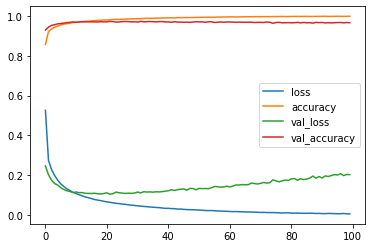

In [25]:
pd.DataFrame(history_callback.history).plot()

Text(0, 0.5, 'loss')

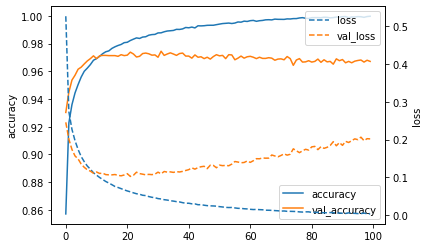

In [27]:
df = pd.DataFrame(history_callback.history)
df[['accuracy', 'val_accuracy']].plot()
plt.ylabel('accuracy')
df[['loss', 'val_loss']].plot(linestyle = '--', ax = plt.twinx())
plt.ylabel('loss')

In [29]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV

def make_model(optimizer = 'adam', hidden_size =32):
    model = Sequential([
    Dense(32, input_shape = (784, )),
    Activation('relu'),
    Dense(10),
    Activation('softmax'), ])
    model.compile('adam', 'categorical_crossentropy', metrics = ['accuracy'])
    return model

clf = KerasClassifier(make_model)

param_grid = {'epochs': [1, 5, 10], 'hidden_size': [32, 64, 256]}

grid = GridSearchCV(clf, param_grid = param_grid, return_train_score=True)

In [31]:
grid.fit(X_train, y_train)

1500/1500 [==============================] - 1s 582us/step - loss: 0.2308 - accuracy: 0.9366
Epoch 1/5
1500/1500 [==============================] - 1s 713us/step - loss: 0.4032 - accuracy: 0.8885
Epoch 2/5
1500/1500 [==============================] - 1s 604us/step - loss: 0.2110 - accuracy: 0.9392
Epoch 3/5
1500/1500 [==============================] - 1s 733us/step - loss: 0.1702 - accuracy: 0.9510
Epoch 4/5
1500/1500 [==============================] - 1s 736us/step - loss: 0.1442 - accuracy: 0.9577
Epoch 5/5
1500/1500 [==============================] - 1s 588us/step - loss: 0.1070 - accuracy: 0.9682
Epoch 1/5
1500/1500 [==============================] - 1s 896us/step - loss: 0.3905 - accuracy: 0.8902
Epoch 2/5
1500/1500 [==============================] - 1s 833us/step - loss: 0.2216 - accuracy: 0.9363
Epoch 3/5
1500/1500 [==============================] - 1s 714us/step - loss: 0.1733 - accuracy: 0.9494
Epoch 4/5
1500/1500 [==============================] - 1s 768us/step - loss: 0.1460

1500/1500 [==============================] - 1s 553us/step - loss: 0.2115 - accuracy: 0.9403
Epoch 3/5
1500/1500 [==============================] - 1s 552us/step - loss: 0.1671 - accuracy: 0.9522
Epoch 4/5
1500/1500 [==============================] - 1s 567us/step - loss: 0.1401 - accuracy: 0.9597
Epoch 5/5
1500/1500 [==============================] - 1s 417us/step - loss: 0.1063 - accuracy: 0.9688
Epoch 1/5
1500/1500 [==============================] - 1s 598us/step - loss: 0.3992 - accuracy: 0.8885
Epoch 2/5
1500/1500 [==============================] - 1s 590us/step - loss: 0.2131 - accuracy: 0.9392
Epoch 3/5
1500/1500 [==============================] - 1s 587us/step - loss: 0.1679 - accuracy: 0.9521
Epoch 4/5
1500/1500 [==============================] - 1s 576us/step - loss: 0.1414 - accuracy: 0.9596
Epoch 5/5
1500/1500 [==============================] - 1s 430us/step - loss: 0.1018 - accuracy: 0.9715
Epoch 1/5
1500/1500 [==============================] - 1s 615us/step - loss: 0.3825

1500/1500 [==============================] - 1s 594us/step - loss: 0.3808 - accuracy: 0.8956
Epoch 2/10
1500/1500 [==============================] - 1s 593us/step - loss: 0.2069 - accuracy: 0.9410
Epoch 3/10
1500/1500 [==============================] - 1s 622us/step - loss: 0.1624 - accuracy: 0.9523
Epoch 4/10
1500/1500 [==============================] - 1s 582us/step - loss: 0.1343 - accuracy: 0.9610
Epoch 5/10
1500/1500 [==============================] - 1s 582us/step - loss: 0.1160 - accuracy: 0.9657
Epoch 6/10
1500/1500 [==============================] - 1s 605us/step - loss: 0.1020 - accuracy: 0.9696
Epoch 7/10
1500/1500 [==============================] - 1s 597us/step - loss: 0.0904 - accuracy: 0.9729
Epoch 8/10
1500/1500 [==============================] - 1s 638us/step - loss: 0.0822 - accuracy: 0.9751
Epoch 9/10
1500/1500 [==============================] - 1s 597us/step - loss: 0.0749 - accuracy: 0.9776
Epoch 10/10
1500/1500 [==============================] - 1s 437us/step - lo

1500/1500 [==============================] - 1s 591us/step - loss: 0.1331 - accuracy: 0.9607
Epoch 5/10
1500/1500 [==============================] - 1s 570us/step - loss: 0.1145 - accuracy: 0.9665
Epoch 6/10
1500/1500 [==============================] - 1s 571us/step - loss: 0.1008 - accuracy: 0.9694
Epoch 7/10
1500/1500 [==============================] - 1s 570us/step - loss: 0.0896 - accuracy: 0.9735
Epoch 8/10
1500/1500 [==============================] - 1s 569us/step - loss: 0.0822 - accuracy: 0.9749
Epoch 9/10
1500/1500 [==============================] - 1s 555us/step - loss: 0.0741 - accuracy: 0.9777
Epoch 10/10
1500/1500 [==============================] - 1s 443us/step - loss: 0.0577 - accuracy: 0.9831
Epoch 1/10
1500/1500 [==============================] - 1s 585us/step - loss: 0.3985 - accuracy: 0.8904
Epoch 2/10
1500/1500 [==============================] - 1s 572us/step - loss: 0.2187 - accuracy: 0.9380
Epoch 3/10
1500/1500 [==============================] - 1s 552us/step - lo

1500/1500 [==============================] - 1s 572us/step - loss: 0.0877 - accuracy: 0.9738
Epoch 10/10
1500/1500 [==============================] - 1s 445us/step - loss: 0.0679 - accuracy: 0.9804
Epoch 1/10
1500/1500 [==============================] - 1s 564us/step - loss: 0.4016 - accuracy: 0.8883
Epoch 2/10
1500/1500 [==============================] - 1s 559us/step - loss: 0.2000 - accuracy: 0.9436
Epoch 3/10
1500/1500 [==============================] - 1s 567us/step - loss: 0.1576 - accuracy: 0.9545
Epoch 4/10
1500/1500 [==============================] - 1s 588us/step - loss: 0.1335 - accuracy: 0.9614
Epoch 5/10
1500/1500 [==============================] - 1s 571us/step - loss: 0.1170 - accuracy: 0.9660
Epoch 6/10
1500/1500 [==============================] - 1s 579us/step - loss: 0.1042 - accuracy: 0.9693
Epoch 7/10
1500/1500 [==============================] - 1s 593us/step - loss: 0.0924 - accuracy: 0.9725
Epoch 8/10
1500/1500 [==============================] - 1s 590us/step - lo

GridSearchCV(estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001CF240A3D48>,
             param_grid={'epochs': [1, 5, 10], 'hidden_size': [32, 64, 256]},
             return_train_score=True)

In [33]:
res = pd.DataFrame(grid.cv_results_)

In [34]:
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_epochs,param_hidden_size,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.223151,0.036747,0.274050,0.008689,1,32,"{'epochs': 1, 'hidden_size': 32}",0.937667,0.927333,0.924750,...,0.928950,0.006999,7,0.939604,0.935458,0.931958,0.934104,0.932854,0.934796,0.002678
1,1.221354,0.044215,0.262562,0.002650,1,64,"{'epochs': 1, 'hidden_size': 64}",0.930833,0.929667,0.929667,...,0.928817,0.005224,9,0.931979,0.940771,0.938146,0.930562,0.933729,0.935037,0.003837
2,1.284699,0.101269,0.275122,0.008237,1,256,"{'epochs': 1, 'hidden_size': 256}",0.931500,0.926583,0.927417,...,0.928883,0.004436,8,0.934500,0.937896,0.936562,0.937146,0.936562,0.936533,0.001129
3,5.273876,0.601524,0.282724,0.026998,5,32,"{'epochs': 5, 'hidden_size': 32}",0.957833,0.954583,0.956500,...,0.956300,0.002563,6,0.968167,0.968604,0.968479,0.970479,0.968813,0.968908,0.000813
4,4.809999,0.074463,0.315353,0.100866,5,64,"{'epochs': 5, 'hidden_size': 64}",0.959917,0.956167,0.956833,...,0.957850,0.002982,4,0.971479,0.969604,0.972438,0.973771,0.972250,0.971908,0.001368
5,5.292460,0.077969,0.279782,0.007081,5,256,"{'epochs': 5, 'hidden_size': 256}",0.960833,0.959750,0.954500,...,0.957533,0.002778,5,0.973813,0.971833,0.968521,0.969542,0.967583,0.970258,0.002272
6,9.956735,0.625714,0.274306,0.019799,10,32,"{'epochs': 10, 'hidden_size': 32}",0.962083,0.960000,0.963250,...,0.961167,0.001729,1,0.982437,0.982292,0.983396,0.982250,0.979521,0.981979,0.001299
7,9.022789,0.105203,0.268638,0.011856,10,64,"{'epochs': 10, 'hidden_size': 64}",0.963000,0.962917,0.957583,...,0.959950,0.003865,3,0.979396,0.983104,0.978854,0.977188,0.980708,0.979850,0.001981
8,9.380167,0.323993,0.267264,0.014072,10,256,"{'epochs': 10, 'hidden_size': 256}",0.958750,0.958500,0.961333,...,0.959967,0.002461,2,0.979604,0.977875,0.980417,0.980313,0.981021,0.979846,0.001083


In [36]:
res.pivot_table(index = ['param_epochs', 'param_hidden_size'], values = ['mean_train_score', 'mean_test_score', 'rank_test_score'])

mean_test_score  mean_train_score  \
param_epochs param_hidden_size                                      
1            32                        0.928950          0.934796   
             64                        0.928817          0.935037   
             256                       0.928883          0.936533   
5            32                        0.956300          0.968908   
             64                        0.957850          0.971908   
             256                       0.957533          0.970258   
10           32                        0.961167          0.981979   
             64                        0.959950          0.979850   
             256                       0.959967          0.979846   

                                rank_test_score  
param_epochs param_hidden_size                   
1            32                               7  
             64                               9  
             256                              8  
5            32                               6  
             64                               4  
             256                              5  
10           32                               1  
             64                               3  
             256                              2

In [37]:
grid.score(X_test, y_test)

313/313 [==============================] - 0s 568us/step - loss: 0.1099 - accuracy: 0.9684


0.9684000015258789

In [38]:
model = Sequential([
    Dense(1024, input_shape = (784, )),
    Activation('relu'),
    Dense(1024, ),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])
model.compile('adam', 'categorical_crossentropy', metrics = ['accuracy'])
history_callback = model.fit(X_train, y_train, batch_size = 128, epochs = 20, verbose = 1, validation_split = 0.1)

Epoch 1/20
422/422 [==============================] - 5s 12ms/step - loss: 0.2037 - accuracy: 0.9393 - val_loss: 0.0829 - val_accuracy: 0.9747
Epoch 2/20
422/422 [==============================] - 5s 12ms/step - loss: 0.0744 - accuracy: 0.9774 - val_loss: 0.0865 - val_accuracy: 0.9758
Epoch 3/20
422/422 [==============================] - 5s 11ms/step - loss: 0.0480 - accuracy: 0.9842 - val_loss: 0.0763 - val_accuracy: 0.9785
Epoch 4/20
422/422 [==============================] - 5s 11ms/step - loss: 0.0336 - accuracy: 0.9892 - val_loss: 0.0856 - val_accuracy: 0.9762
Epoch 5/20
422/422 [==============================] - 5s 11ms/step - loss: 0.0285 - accuracy: 0.9907 - val_loss: 0.0902 - val_accuracy: 0.9757
Epoch 6/20
422/422 [==============================] - 5s 12ms/step - loss: 0.0210 - accuracy: 0.9927 - val_loss: 0.0909 - val_accuracy: 0.9788
Epoch 7/20
422/422 [==============================] - 5s 12ms/step - loss: 0.0199 - accuracy: 0.9932 - val_loss: 0.0958 - val_accuracy: 0.9777

In [39]:
model.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_98 (Dense)             (None, 1024)              803840    
_________________________________________________________________
activation_98 (Activation)   (None, 1024)              0         
_________________________________________________________________
dense_99 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
activation_99 (Activation)   (None, 1024)              0         
_________________________________________________________________
dense_100 (Dense)            (None, 10)                10250     
_________________________________________________________________
activation_100 (Activation)  (None, 10)                0         
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
___________________________________________

In [41]:
model.evaluate(X_test, y_test, verbose = 0)

[0.09000576287508011, 0.9836000204086304]

Text(0, 0.5, 'loss')

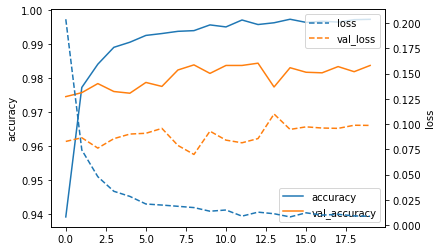

In [42]:
df = pd.DataFrame(history_callback.history)
df[['accuracy', 'val_accuracy']].plot()
plt.ylabel('accuracy')
df[['loss', 'val_loss']].plot(linestyle = '--', ax = plt.twinx())
plt.ylabel('loss')

In [45]:
from keras.layers import Dropout

model_dropout = Sequential([
    Dense(1024, input_shape = (784, )),
    Activation('relu'),
    Dropout(0.5),
    Dense(1024, ),
    Activation('relu'),
    Dropout(0.5),
    Dense(10),
    Activation('softmax'),
])
model_dropout.compile('adam', 'categorical_crossentropy', metrics = ['accuracy'])
history_dropout = model_dropout.fit(X_train, y_train, batch_size = 128, epochs = 20, verbose = 1, validation_split = 0.1)

Epoch 1/20
422/422 [==============================] - 6s 14ms/step - loss: 0.2935 - accuracy: 0.9098 - val_loss: 0.0956 - val_accuracy: 0.9712
Epoch 2/20
422/422 [==============================] - 6s 14ms/step - loss: 0.1404 - accuracy: 0.9569 - val_loss: 0.0788 - val_accuracy: 0.9775
Epoch 3/20
422/422 [==============================] - 6s 14ms/step - loss: 0.1105 - accuracy: 0.9653 - val_loss: 0.0751 - val_accuracy: 0.9778
Epoch 4/20
422/422 [==============================] - 6s 14ms/step - loss: 0.0937 - accuracy: 0.9711 - val_loss: 0.0610 - val_accuracy: 0.9820
Epoch 5/20
422/422 [==============================] - 6s 13ms/step - loss: 0.0824 - accuracy: 0.9737 - val_loss: 0.0583 - val_accuracy: 0.9830
Epoch 6/20
422/422 [==============================] - 6s 13ms/step - loss: 0.0783 - accuracy: 0.9752 - val_loss: 0.0600 - val_accuracy: 0.9820
Epoch 7/20
422/422 [==============================] - 6s 13ms/step - loss: 0.0668 - accuracy: 0.9788 - val_loss: 0.0571 - val_accuracy: 0.9845

In [46]:
model_dropout.summary()

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 1024)              803840    
_________________________________________________________________
activation_101 (Activation)  (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_102 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
activation_102 (Activation)  (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_103 (Dense)            (None, 10)              

Text(0, 0.5, 'loss')

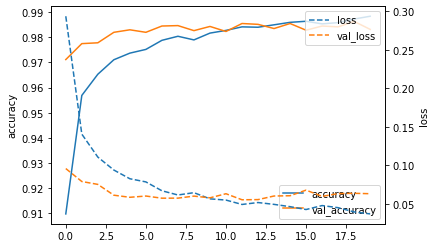

In [47]:
df = pd.DataFrame(history_dropout.history)
df[['accuracy', 'val_accuracy']].plot()
plt.ylabel('accuracy')
df[['loss', 'val_loss']].plot(linestyle = '--', ax = plt.twinx())
plt.ylabel('loss')

In [48]:
model_dropout.evaluate(X_test, y_test, verbose = 0)

[0.06022654473781586, 0.9860000014305115]